In [184]:
import pandas as pd
import torch
import joblib
import numpy as np
import math
import matplotlib.pyplot as plt
from torch import nn
from torchviz import make_dot
from torchview import draw_graph
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [185]:
df = pd.read_csv('diabetes_data.csv')
df.dropna(inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [186]:
#Count the binary values in the 'Outcome' column
outcome_counts = df['Outcome'].value_counts()

#Print the counts
print(outcome_counts)

#Insight: Unbalanced dataset

Outcome
0    500
1    268
Name: count, dtype: int64


In [187]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

x_train_tensor = torch.tensor(x_train.values).to(torch.float32)
x_test_tensor = torch.tensor(x_test.values).to(torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [188]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    #input layer
    self.layer1 = nn.Linear(8,70)
    self.relu1 = nn.ReLU()

    self.layer2 = nn.Linear(70,70)
    self.relu2 = nn.ReLU()

    self.layer3 = nn.Linear(70,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.layer1(x)
    x = self.relu1(x)

    x = self.layer2(x)
    x = self.relu2(x)

    x = self.layer3(x)
    pred = self.sigmoid(x)
    return pred #returns prediction

In [189]:
model = NeuralNetwork()
loss_fn = nn.BCELoss()

#BACK PROPAGATION, optimizers (gradient descent optimizer)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)# parameters that will be updated

In [190]:
#set the model into training mode
model.train()

for epoch in range(100):
  for i in range(0, len(x_train), 5):
    #Calculate how far from true value
    pred = model(x_train_tensor[i:i+1])
    loss = loss_fn(pred, y_train_tensor[i:i+1]) #generate a loss, error score

    #Update the weights
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.08525291830301285
Epoch 2, Loss: 0.26843100786209106
Epoch 3, Loss: 0.3075687885284424
Epoch 4, Loss: 0.3449542820453644
Epoch 5, Loss: 0.3222932517528534
Epoch 6, Loss: 0.3876888155937195
Epoch 7, Loss: 0.3996546268463135
Epoch 8, Loss: 0.3761599659919739
Epoch 9, Loss: 0.3528100252151489
Epoch 10, Loss: 0.3939596712589264
Epoch 11, Loss: 0.38220348954200745
Epoch 12, Loss: 0.3086250126361847
Epoch 13, Loss: 0.36712586879730225
Epoch 14, Loss: 0.3627662658691406
Epoch 15, Loss: 0.35049107670783997
Epoch 16, Loss: 0.34421196579933167
Epoch 17, Loss: 0.3069571554660797
Epoch 18, Loss: 0.3400770127773285
Epoch 19, Loss: 0.31279271841049194
Epoch 20, Loss: 0.3187158405780792
Epoch 21, Loss: 0.3019483685493469
Epoch 22, Loss: 0.3495926856994629
Epoch 23, Loss: 0.2906704246997833
Epoch 24, Loss: 0.2940763533115387
Epoch 25, Loss: 0.3260017931461334
Epoch 26, Loss: 0.3217352032661438
Epoch 27, Loss: 0.3394089937210083
Epoch 28, Loss: 0.296368807554245
Epoch 29, Loss: 0.30433

In [191]:
model.eval()  #Set model to evaluation mode
predictions = []

for i in range(len(x_test)):
    with torch.no_grad():
        pred = model(x_test_tensor[i]).round()
        predictions.append(pred.item())  # Append the prediction as a scalar

# Convert predictions to a NumPy array
y_pred = np.array(predictions)
y_true = y_test_tensor.numpy().flatten()  # Convert y_test_tensor to NumPy array

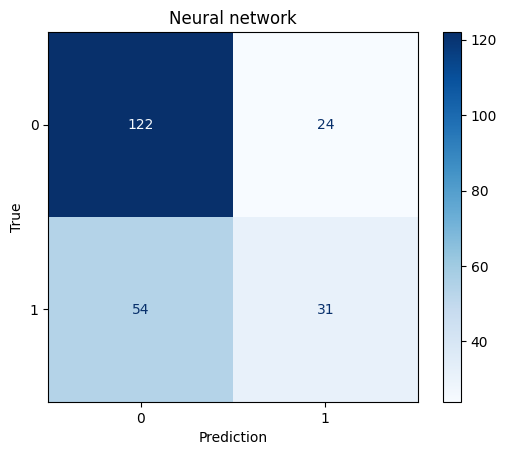

Accuracy: 0.6623376623376623
Precision: 0.5636363636363636
Recall: 0.36470588235294116
F1-score: 0.44285714285714284


In [192]:
acc_nn1 = accuracy_score(y_true, y_pred)
precision_nn1 = precision_score(y_true, y_pred)
recall_nn1 = recall_score(y_true, y_pred)
f1_score_nn1 = f1_score(y_true, y_pred)
cm_nn = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp.plot(cmap="Blues")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.title("Neural network")
plt.show()
# Print results
print(f'Accuracy: {acc_nn1}')
print(f'Precision: {precision_nn1}')
print(f'Recall: {recall_nn1}')
print(f"F1-score: {f1_score_nn1}")

In [193]:
torch.save(model.state_dict(), 'classicalnn-model.pth')

In [194]:
# Create a sample input tensor that matches your input shape
sample_input = torch.randn(1, 8)  # batch size = 1, features = 8

# Pass the sample input through the model to get the computation graph
output = model(sample_input)

# Create and render the visualization
dot = make_dot(output, params=dict(model.named_parameters()))
dot.format = 'png'
dot.render('neural_network_architecture')

'neural_network_architecture.png'

/Users/robin/Documents/GitHub/CSCI_111_Final_Project/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


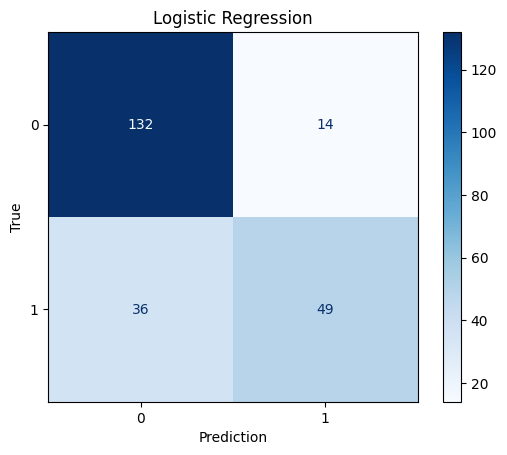

This is the model's coef_ [[ 0.10107846  0.03357831 -0.01570481 -0.00135947 -0.00069553  0.08937806
   0.55938328  0.01707619]].
This is the model's intercepts [-7.86410566].
These are the model's predictions [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0].
This is the model's precision score 0.78.
This is the model's recall score 0.58.
This is the model's f1 score 0.66.
This is the model's accuracy 78.35%.


In [195]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_predicted = logistic_model.predict(x_test)
logistic_accuracy = accuracy_score(y_test, logistic_predicted)
logistic_recall = recall_score(y_test, logistic_predicted)
logistic_precision = precision_score(y_test, logistic_predicted)
logistic_f1 = f1_score(y_test, logistic_predicted)

cm = confusion_matrix(y_test, logistic_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.title("Logistic Regression")
plt.show()
print(f"This is the model's coef_ {logistic_model.coef_}.")
print(f"This is the model's intercepts {logistic_model.intercept_}.")
print(f"These are the model's predictions {logistic_predicted}.")
print(f"This is the model's precision score {logistic_precision:.2f}.")
print(f"This is the model's recall score {logistic_recall:.2f}.")
print(f"This is the model's f1 score {logistic_f1:.2f}.")
print(f"This is the model's accuracy {(logistic_accuracy*100):.2f}%.")
